In [18]:
import pandas as pd

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

In [20]:
df_cons=pd.read_csv(r'D:\Docs\coffee_data\domestic-consumption.csv')


In [21]:
df_cons.columns

Index(['domestic_consumption', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [22]:
## Here i put columns in a list and create a seperate list for the year variable
## just one line of code
cols=list(df_cons.columns)[1:] 
cols

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [23]:
##use melt function to turn data into a normalised format
df = pd.melt(df_cons, id_vars='domestic_consumption', value_vars=cols)
### we put column namws 
col_n=["Country","Year","Qty"]
df.columns=col_n
df.head()

,Country,Year,Qty
0,Angola,1990,20.0
1,Bolivia (Plurinational State of),1990,25.0
2,Brazil,1990,8200.0
3,Burundi,1990,2.0
4,Ecuador,1990,350.0


In [31]:
##east africa
east=['Uganda','Kenya','Tanzania','Rwanda','Ethiopia']
east_df=[]
for c in east:
    #put name
    #name='df_'+c
    #print(name)  
    east_df.append(df[(df['Country']==c)])  

In [33]:
def get_color(c):
        switcher={
                'Uganda':'red',
                'Tanzania':'green',
                'Rwanda':'blue',
                'Kenya':'orange',
                'Ethiopia':'Purple'
                
             }
        return switcher.get(c)

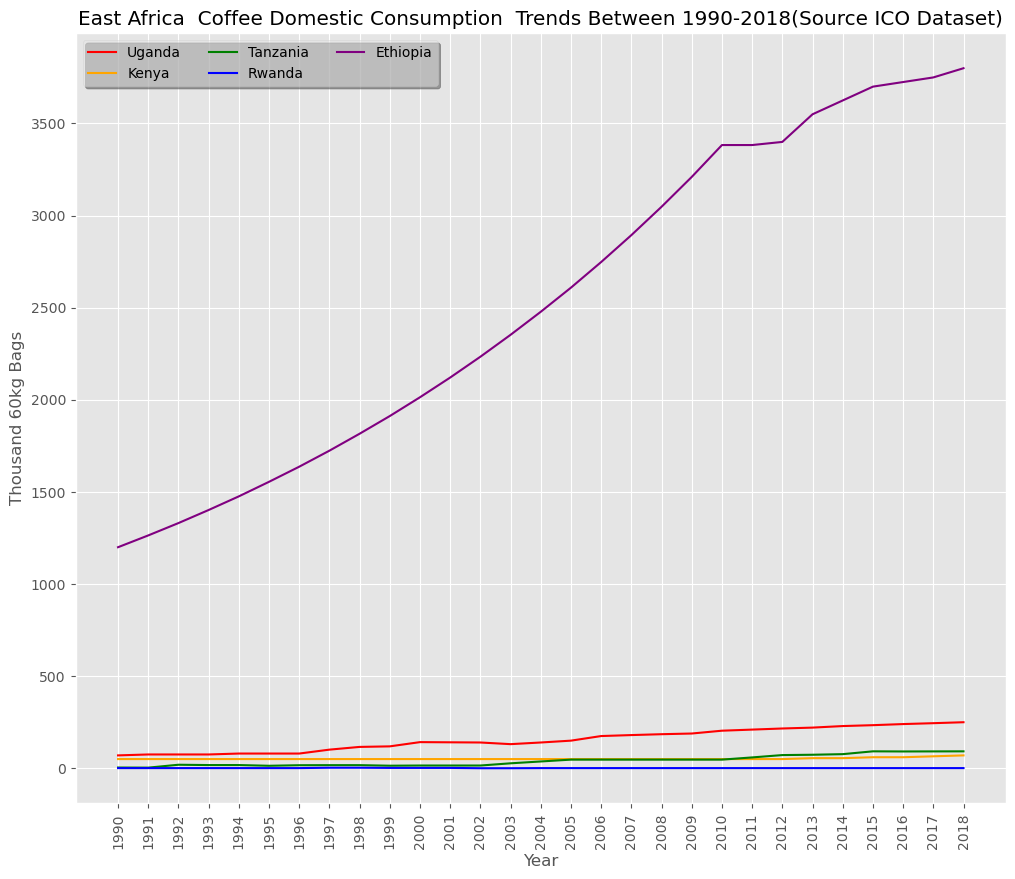

In [35]:
plt.figure(figsize=(12,10))
for i in range(0,len(east_df)):
    plt.plot(east_df[i]['Year'],east_df[i]['Qty'],c= get_color(east[i]),label=east[i])
    leg = plt.legend(loc='best', ncol=3 , shadow=True, fancybox=True)
    plt.title('East Africa  Coffee Domestic Consumption  Trends Between 1990-2018(Source ICO Dataset)')
    plt.xlabel("Year")
    plt.ylabel("Thousand 60kg Bags")
    plt.xticks(rotation=90)
    leg.get_frame().set_alpha(0.5)
    plt.savefig(r'D:\Workings\east_cons.png',dpi=300,transparent=False)